<h1>Geometric Operations and Other Mathematical Tools</h1>

#### imports

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
# Function to plot two images side-by-side

def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

## Geometric Transformations

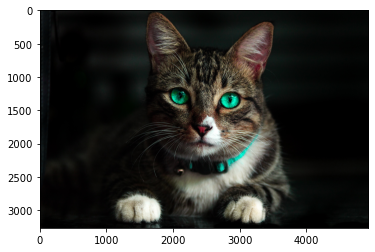

In [3]:
image = Image.open("cat.jpg")
plt.imshow(image)
plt.show()

Scaling the horizontal axis by two and leave the vertical axis:

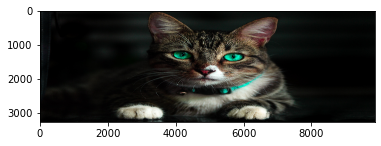

In [4]:
width, height = image.size
new_width = 2 * width
new_hight = height
new_image = image.resize((new_width, new_hight))
plt.imshow(new_image)
plt.show()

Double width and height of the image

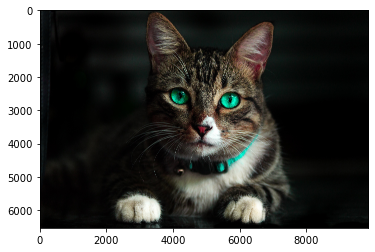

In [5]:
new_width = 2 * width
new_hight = 2 * height
new_image = image.resize((new_width, new_hight))
plt.imshow(new_image)
plt.show()

Shrinking the image's width and height both by 1/2

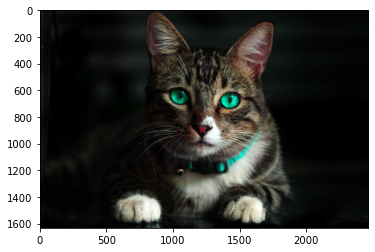

In [6]:
new_width = width // 2
new_hight = height // 2

new_image = image.resize((new_width, new_hight))
plt.imshow(new_image)
plt.show()

## Rotation

* rotate an image by angle $\theta$, using the method `rotate`.

In [7]:
theta = 45
new_image = image.rotate(theta)

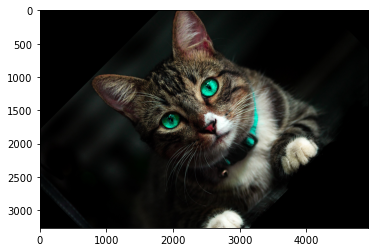

In [8]:
plt.imshow(new_image)
plt.show()

## Mathematical Operations

#### Array Operations

Performing array operations on an image; Using Python broadcasting, we can add a constant to each pixel's intensity value.

Fisrt convert the PIL image to a numpy array.

In [9]:
image = np.array(image)

Add a constant to the image array

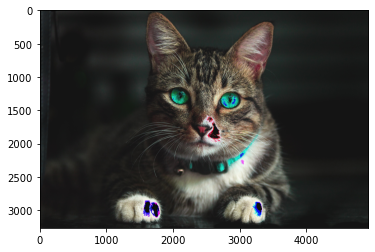

In [10]:
new_image = image + 20
plt.imshow(new_image)
plt.show()

Multiplying every pixel's intensity value by a constant value

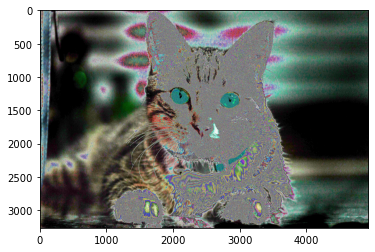

In [11]:
new_image = 10 * image
plt.imshow(new_image)
plt.show()

Adding elemets of two arrays of equal shape. In this example,we generate an array of random noises with the same shape and data type as our image.

In [12]:
Noise = np.random.normal(0, 20, (height, width, 3)).astype(np.uint8)
Noise.shape

(3264, 4928, 3)

Aadd the generated noise to the image and plot the result. We see the values that have corrupted the image:

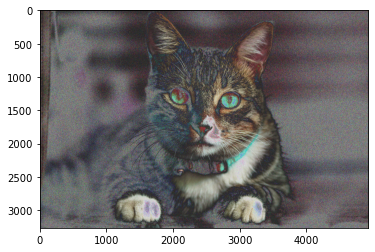

In [13]:
new_image = image + Noise

plt.imshow(new_image)
plt.show()

Multiply the elements of two arrays of equal shape. We can multiply the random image and the Lenna image and plot the result.

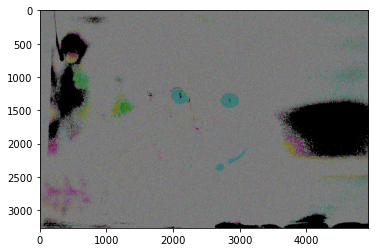

In [14]:
new_image = image*Noise

plt.imshow(new_image)
plt.show()

## Matrix Operations

Grayscale images are matrices. Consider the following grayscale image:

In [16]:
im_gray = Image.open("cat.jpg")

Converting an image to one-channelimage

In [17]:
from PIL import ImageOps 

In [18]:
im_gray = ImageOps.grayscale(im_gray) 

Converting PIL image to a numpy array

In [19]:
im_gray = np.array(im_gray)

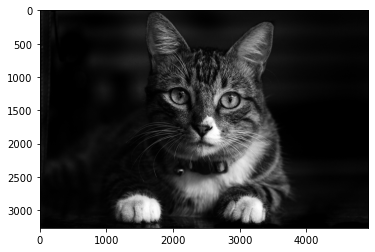

In [20]:
plt.imshow(im_gray,cmap='gray')
plt.show()

Applying algorithms designed for matrices. We can use Singular Value Decomposition, decomposing our image matrix into a product of three matrices.

In [21]:
U, s, V = np.linalg.svd(im_gray , full_matrices=True)

<code>s</code> is not rectangular

In [22]:
s.shape

(3264,)

Converting <code>s</code> to a diagonal matrix <code>S</code>

In [24]:
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)

Plotting matrix U and V

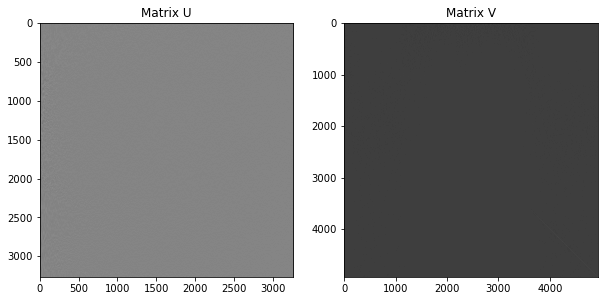

In [25]:
plot_image(U, V, title_1="Matrix U", title_2="Matrix V")

See most of the elements in S are zero:

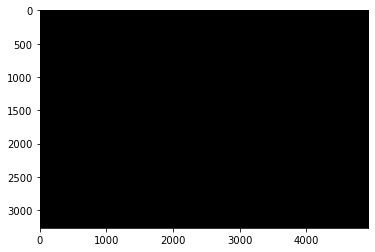

In [26]:
plt.imshow(S, cmap='gray')
plt.show()

Finding the matrix product of all the matrices. First, we can perform matrix multiplication on S and U and assign it to B and plot the results:

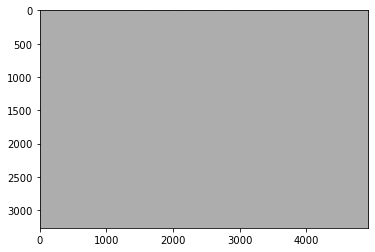

In [27]:
B = S.dot(V)
plt.imshow(B,cmap='gray')
plt.show()

We can find the matrix product of `U`, `S`, and `B`. We see it's the entire image:

In [28]:
A = U.dot(B)

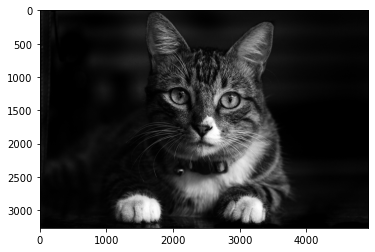

In [29]:
plt.imshow(A,cmap='gray')
plt.show()

many elements are redundant. We can eliminate some rows and columns of S and V and approximate the image by finding the product:

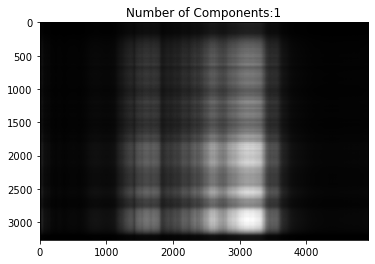

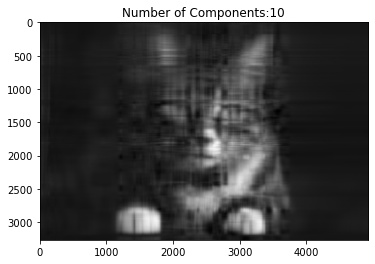

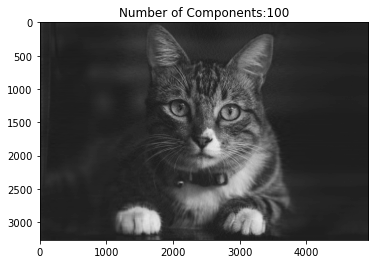

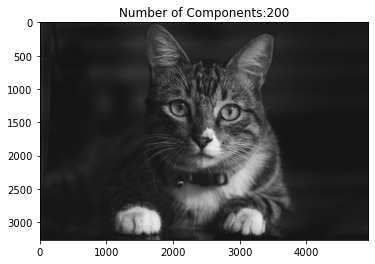

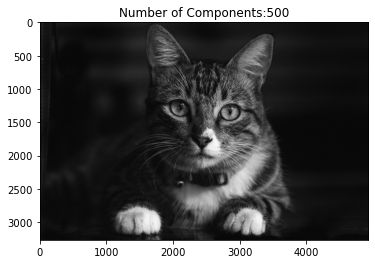

In [30]:
for n_component in [1,10,100,200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A,cmap='gray')
    plt.title("Number of Components:"+str(n_component))
    plt.show()

we only need 100 to 200 Components to represent the image.

* images where taken from Kelvin Valerio from Pexels: https://www.pexels.com/es-es/foto/gato-marron-con-ojos-verdes-617278/